In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import RobustScaler
from scipy import stats
import warnings
import string
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings('ignore')
%matplotlib inline

In [340]:
df = pd.read_csv('C:/Analytics/ItemMatching/PreProcess/food_fitcher_exploration.csv')

In [341]:
#feeling the data 
headers = df.columns ## retrieving the dataset headers names
headers_list = list(headers) ## converting the pandas object to a list


In [342]:
#checking if data is balanced
df.count()

bar_product_id     370793
title              370786
price              370793
category_id        370793
country_id         370793
brand_id           368001
super_brand_id     370793
volume_id          368001
beer_type_id       332420
serving_type_id    331916
train              370793
dtype: int64

In [343]:
virable = 'price'


In [344]:
#cleansing data function - turn words to lowercse, strip punctuation and numbers and remove nulls
def data_cleaner(df,column_name):
    df[column_name] = df[column_name].str.replace('[{}]'.format(string.punctuation+"0123456789"), '')
    df[column_name]= df[column_name].str.lower()
    df = df.dropna(subset=[column_name])
    return(df)
#active function on each and every un-numerical virable 
df = data_cleaner(df,'title')
#df = data_cleaner(df,'country_id')

#aligning the data - make sure data is balanced
df = df.dropna(how='any')
df[virable] = df.price.astype(float)
df.count()

bar_product_id     331026
title              331026
price              331026
category_id        331026
country_id         331026
brand_id           331026
super_brand_id     331026
volume_id          331026
beer_type_id       331026
serving_type_id    331026
train              331026
dtype: int64

In [345]:
def Scaling(X_train):
    X_train = X_train.reshape(-1,1)
    scaler = StandardScaler() ##init
    scaler.fit(X_train) ## fit according to train data
    X_scaled = scaler.transform(X_train) ##transform trin
    return X_scaled

In [346]:
#cleaning virable by quantline (possible to do it also by stdv)
#q virable is the virable value that explaines x percent of the data
#this section gives relation between num of samples and covers level
def quantline_presentor(df):
    x = [0.5,0.75,0.80,0.85,0.9,0.92,0.95,0.96,0.98,0.9,0.99,0.999,0.99999,1.0]
    y=[]
    data=[]
    per=[]
    for i in x:
        q = df[virable].quantile(i)   #what is the price that covers 90% of the samples?
        y.append(q)
        data.append((i,q))
    gap=[0]    
    for tup in range(len(data)-1):
        rez =(data[tup][1],data[tup+1][1],data[tup+1][1]-data[tup][1])
        if rez[2]> max(gap):
            gap.append(data[tup-1][0])
    precentage=gap[-1]
    plt.scatter(x, y,alpha=0.8)
    plt.show()
    return(precentage)
    

In [347]:
#cleaning virable by quantline (possible to do it also by stdv)
#q virable is the virable value that explaines x percent of the data
def quantile_outlier_removal(df,percantge):
    print('percantge is '+ str(percantge))
    count_before_outliers = df[virable].count()
    q = df[virable].quantile(percantge)   #what is the price that covers x% of the data
    print('q is '+ str(q))
    df_1 =df[df[virable] < q]
    #cleaning negative prices
    df_2 =df_1[df_1[virable] >  0]
    count_after_outliers = df_2[virable].count()
    num_of_outliers = count_before_outliers- count_after_outliers
    per_of_outliers = (num_of_outliers/count_before_outliers)*100
    print('name of data '+str(df_2.country_id.iloc[0]))
    print('num of outliers '+str(num_of_outliers))
    print('outliers are '+str(per_of_outliers) +' percent from the whole data ')
    return(df_2)

In [348]:
#Separting data per countries
argentina_df= df[df.country_id=='Argentina']
australia_df= df[df.country_id=='Australia']
brazil_df= df[df.country_id=='Brazil']
canada_df= df[df.country_id=='Canada']
korea_df= df[df.country_id=='Korea']
uk_df= df[df.country_id=='United Kingdom']
us_df= df[df.country_id=='United States']
df_list=[argentina_df,australia_df,brazil_df,canada_df,korea_df,uk_df,us_df]




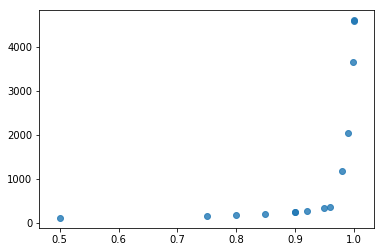

percantge is 0.999
q is 3662.345710000007
name of data Argentina
num of outliers 236
outliers are 1.984861227922624 percent from the whole data 
count    11654.000000
mean       175.168229
std        293.117232
min          0.010000
25%         85.000000
50%        120.000000
75%        170.000000
max       3661.390000
Name: price, dtype: float64


percantge is 0.999
q is 334.1950000000361
name of data Australia
num of outliers 4756
outliers are 5.788564056376427 percent from the whole data 
count    77406.000000
mean        18.841396
std         21.433893
min          0.100000
25%          6.200000
50%          9.500000
75%         21.500000
max        330.000000
Name: price, dtype: float64


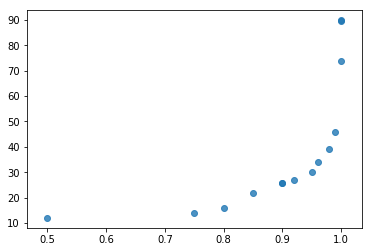

percantge is 0.99
q is 45.75500000000013
name of data Brazil
num of outliers 11
outliers are 1.3647642679900744 percent from the whole data 
count    795.000000
mean      13.582566
std        7.222322
min        0.010000
25%        9.300000
50%       12.000000
75%       13.900000
max       43.000000
Name: price, dtype: float64


percantge is 0.999
q is 94.61851000001028
name of data Canada
num of outliers 7565
outliers are 7.426131343869638 percent from the whole data 
count    94305.000000
mean         8.970129
std          6.823991
min          0.010000
25%          5.000000
50%          6.830000
75%          9.740000
max         94.460000
Name: price, dtype: float64


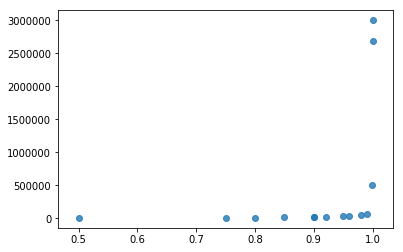

percantge is 0.999
q is 500000.0
name of data Korea
num of outliers 537
outliers are 2.355159861409587 percent from the whole data 
count     22264.000000
mean      10987.119340
std       17941.273972
min           1.000000
25%        5000.000000
50%        7000.000000
75%       10000.000000
max      420000.000000
Name: price, dtype: float64


percantge is 0.999
q is 137.60700000007273
name of data United Kingdom
num of outliers 641
outliers are 3.0173225381284126 percent from the whole data 
count    20603.000000
mean         4.400375
std          5.384988
min          0.200000
25%          2.400000
50%          3.500000
75%          4.500000
max         99.000000
Name: price, dtype: float64


percantge is 0.999
q is 117.40484000004348
name of data United States
num of outliers 2867
outliers are 3.1766257077327067 percent from the whole data 
count    87386.000000
mean         7.625679
std          5.303656
min          0.010000
25%          5.000000
50%          6.250000
75%          8.000000
max        112.670000
Name: price, dtype: float64


In [349]:
new_df=[]
for df in df_list: 
#choose virable you want to explore  
    per = quantline_presentor(df)
    df =quantile_outlier_removal(df,per)
    #show virable distribution after outliers 
    print(df[virable].describe())
    df[virable]= Scaling(df.values[0:,2])
    new_df.append(df)
df = pd.concat(new_df)
    

In [350]:
df.head()

bar_product_id                  title     price  category_id country_id  \
79          1368095          cerveza negra -0.102926            1  Argentina   
89          1368418         stella artrois  0.033544            1  Argentina   
97          1368657  on stout cchoco pinta -0.290573            1  Argentina   
100         1368783  elefante jarrontirada  0.050602            1  Argentina   
233         1370633         quilmes tirada -0.409984            1  Argentina   

     brand_id  super_brand_id  volume_id  beer_type_id  serving_type_id  train  
79     1446.0               0       1.00           1.0              1.0      1  
89       44.0               5       0.33           1.0              2.0      1  
97     3009.0               0       0.50           6.0              2.0      1  
100    1301.0               0       1.00           1.0              2.0      1  
233    1301.0               0       0.33           1.0              2.0      1

In [430]:
def word_counter(df):
    print('name of data '+str(df.country_id.iloc[0]))
    corpus = df.title.values
    print('num of titles '+str(len(corpus)))
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    print('num of unique word '+str(len(vectorizer.get_feature_names())))
    words = np.asarray(vectorizer.get_feature_names()).reshape(len(vectorizer.get_feature_names()),1)
    word_counter = np.asarray(X.sum(axis=0))
    word_counter = np.transpose(word_counter)
    stack = np.stack((words, word_counter), axis=1).reshape([len(vectorizer.get_feature_names()), 2])
    temp_df = pd.DataFrame(stack,columns=['words','counter'])
    sort_temp_df = temp_df.sort_values(by=['counter'],ascending=False)
    print(sort_temp_df.head(5))
    print(''.join('')+'\n')
    return()

In [431]:
for df in df_list: 
    word_counter(df)

name of data Argentina
num of titles 11890
num of unique word 907
          words counter
617       patag      96
222          cm      91
388    heineken      90
141          bz       9
51   bacodeitor       9


name of data Australia
num of titles 82162
num of unique word 4143
        words counter
3169      sch     991
501     brown      99
1328  fosters      99
2845   plight      99
1069     dght      99


name of data Brazil
num of titles 806
num of unique word 285
       words counter
59     chopp      90
82        de       9
166       ln       9
53   cerveja      85
171     long      84


name of data Canada
num of titles 101870
num of unique word 7184
        words counter
3937      lrg     994
1463    cider     983
3989  magners      98
5983       sl      97
6415      sun      97


name of data Korea
num of titles 22801
num of unique word 1455
       words counter
1085      ¼ì     953
1264      ìˆ      90
439      ice       9
587   monaco       9
367    grape       9


name of 